## Análisis de Sentimientos con Emojis

Hasta ahora, el problema más grande sería el entrenar en modelo con texto en español debido a que no he encontrado *corpora* en español. En todo caso, habría que hacer el label nosotros mismos.

In [2]:
import numpy as np
from emoji_utils import *
import emoji
import matplotlib.pyplot as plt

In [3]:
emoji_dict = {
    "0": ":smile:",
    "1": ":disappointed:",
    "2": ":rage:",
    "3": ":yum:",
    "4": ":heart:",
    "5": ":thumbsup:",
    "6": ":thumbsdown:",
    "7": ":clap:",
    "8": ":telephone:",
    "9": ":moneybag:",
    "10": ":smoking:",
    "11": ":soccer:",
    "12": ":bikini:",
    "13": ":x:",
    "14": ":raised_hands:",
    "15": ":ok_hand:"
}

In [4]:
for key, value in emoji_dict.items():
    print(key + " - " + emoji.emojize(value, use_aliases=True))

0 - 😄
1 - 😞
2 - 😡
3 - 😋
4 - ❤
5 - 👍
6 - 👎
7 - 👏
8 - ☎
9 - 💰
10 - 🚬
11 - ⚽
12 - 👙
13 - ❌
14 - 🙌
15 - 👌


In [57]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/test.csv')

In [58]:
maxLen = len(max(X_train, key=len).split())

In [59]:
max(X_train, key=len).split()

['estoy', 'impresionado', 'por', 'tu', 'trabajo', 'en', 'este', 'proyecto']

In [60]:
index = 19
print(X_train[index], label_to_emoji(Y_train[index]))

me siento un poco decepcionado 😡


In [61]:
Y_oh_train = convert_to_one_hot(Y_train, C = 16)
Y_oh_test = convert_to_one_hot(Y_test, C = 16)

In [62]:
index = 54
print(Y_train[index], "se convirtió en one hot", Y_oh_train[index])

3 se convirtió en one hot [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/muestra-vectors.txt')

In [11]:
word = "derechos"
index = 159501
print("El índice de", word, "en el vocabulario es ", word_to_index[word])
print("La ", str(index) + " palabra en el vocabulario es ", index_to_word[index])

El índice de derechos en el vocabulario es  123184
La  159501 palabra en el vocabulario es  miopatía


In [12]:
oracion = "Me gusta comer pescado"
oracion_2 = oracion.lower().split()
len(word_to_vec_map[oracion_2[0]])  

300

In [13]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = sentence.lower().split()
    avg = np.zeros(300,)
    # avg = np.zeros(len(word_to_vec_map[words[0]]),) esta sería una implementación
    # más robusta para diferentes dimensiones en diferentes archivos. Sin embargo
    # aquí nos causa problemas por ciertas palabras que no están.
    for w in words:
        try:
            avg += word_to_vec_map[w]
        except KeyError as e:
            print("La palabra " + e.args[0] + " no se encuentra en el archivo de representación vectorial")
        avg = avg / len(words)
    
    
    return avg

In [14]:
avg = sentence_to_avg("Me gusta comer pescado", word_to_vec_map)
print("Promedio = ", avg)

Promedio =  [-5.03905469e-03 -2.65552891e-02 -2.17034570e-02  2.26898867e-02
 -2.31156406e-02  1.66134062e-02 -1.02313516e-02 -4.90315625e-03
  5.71416016e-03 -4.16577422e-02 -8.84939844e-03  1.67424883e-02
  7.81736328e-03 -9.19541406e-03  1.39756289e-02  1.53730938e-02
 -5.04787891e-03 -1.13207109e-02  1.43326797e-02 -1.08074141e-02
  6.62330859e-03 -2.67841094e-02  5.68742969e-03 -2.16254570e-02
 -1.50702187e-02  2.55402734e-03 -1.11914375e-02 -8.01660156e-03
 -2.66893359e-02  9.47726563e-04  8.06025000e-03 -2.04077227e-02
  1.78794531e-03 -3.07711367e-02 -5.84889063e-03  1.02423320e-02
  2.54536367e-02 -3.44730469e-04  9.44829687e-03 -2.55509102e-02
  4.09554297e-03  8.04408203e-03 -1.76120352e-02 -1.70221406e-02
 -2.30781836e-02 -7.27417187e-03 -7.84075391e-03 -5.77011328e-03
 -2.49387617e-02  1.62932188e-02  7.86930859e-03  3.02091406e-02
  1.80779688e-03  3.27367344e-02  3.60516875e-02 -1.07382305e-02
 -1.59220586e-02 -1.99008984e-03  2.44127383e-02  4.33357031e-03
 -6.17682031e

In [15]:
def modelo(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 30000):
    
    np.random.seed(1)
    m = Y.shape[0]
    n_y = 16       # Clases (emojis)
    n_h = 300      # Dimensión de los vectores
    
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y, ))
    
    Y_oh = convert_to_one_hot(Y, C = n_y)
    
    
    for t in range(num_iterations):
        for i in range(m):
            avg = sentence_to_avg(X[i], word_to_vec_map)
            
            z = np.dot(W, avg) + b
            a = softmax(z)
            
            cost = -np.sum(np.dot(Y_oh[i], np.log(a)))
            
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y, 1), avg.reshape(1, n_h))
            db = dz
            
            W = W - learning_rate * dW
            b = b - learning_rate * db
            
        if t % 100 == 0:
            print("Epoch " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)
            
    return pred, W, b

#### Aquí explorar el shape tanto de X como de Y

In [16]:
pred, W, b = modelo(X_train, Y_train, word_to_vec_map)

Epoch 0 --- cost = 2.7808232931442087
Accuracy: 0.08547008547008547
Epoch 100 --- cost = 2.5004753090075305
Accuracy: 0.23076923076923078
Epoch 200 --- cost = 2.3088736834048227
Accuracy: 0.36752136752136755
Epoch 300 --- cost = 2.1348538986954257
Accuracy: 0.42735042735042733
Epoch 400 --- cost = 1.9768948232882384
Accuracy: 0.48717948717948717
Epoch 500 --- cost = 1.8332737155258243
Accuracy: 0.5213675213675214
Epoch 600 --- cost = 1.701860867629392
Accuracy: 0.5299145299145299
Epoch 700 --- cost = 1.581033555690564
Accuracy: 0.5299145299145299
Epoch 800 --- cost = 1.4697331870325363
Accuracy: 0.5384615384615384
Epoch 900 --- cost = 1.367258324037859
Accuracy: 0.5470085470085471
Epoch 1000 --- cost = 1.2730851741549674
Accuracy: 0.5555555555555556
Epoch 1100 --- cost = 1.1867570453845602
Accuracy: 0.5726495726495726
Epoch 1200 --- cost = 1.107827249843654
Accuracy: 0.5897435897435898
Epoch 1300 --- cost = 1.035836072700529
Accuracy: 0.5982905982905983
Epoch 1400 --- cost = 0.97030711

Epoch 11700 --- cost = 0.15178716040127332
Accuracy: 0.7521367521367521
Epoch 11800 --- cost = 0.1508295355307659
Accuracy: 0.7521367521367521
Epoch 11900 --- cost = 0.14988493622936042
Accuracy: 0.7521367521367521
Epoch 12000 --- cost = 0.1489530597889492
Accuracy: 0.7521367521367521
Epoch 12100 --- cost = 0.14803361370053938
Accuracy: 0.7606837606837606
Epoch 12200 --- cost = 0.1471263151956628
Accuracy: 0.7606837606837606
Epoch 12300 --- cost = 0.14623089081336116
Accuracy: 0.7606837606837606
Epoch 12400 --- cost = 0.1453470759910871
Accuracy: 0.7606837606837606
Epoch 12500 --- cost = 0.14447461467803915
Accuracy: 0.7606837606837606
Epoch 12600 --- cost = 0.14361325896949612
Accuracy: 0.7606837606837606
Epoch 12700 --- cost = 0.14276276876083696
Accuracy: 0.7606837606837606
Epoch 12800 --- cost = 0.14192291142004188
Accuracy: 0.7692307692307693
Epoch 12900 --- cost = 0.14109346147749838
Accuracy: 0.7692307692307693
Epoch 13000 --- cost = 0.14027420033206353
Accuracy: 0.7692307692307

Epoch 23200 --- cost = 0.0880408703614276
Accuracy: 0.7606837606837606
Epoch 23300 --- cost = 0.08771312875669282
Accuracy: 0.7606837606837606
Epoch 23400 --- cost = 0.08738760622166777
Accuracy: 0.7606837606837606
Epoch 23500 --- cost = 0.0870642800375261
Accuracy: 0.7606837606837606
Epoch 23600 --- cost = 0.08674312783538135
Accuracy: 0.7606837606837606
Epoch 23700 --- cost = 0.08642412758885833
Accuracy: 0.7606837606837606
Epoch 23800 --- cost = 0.0861072576068257
Accuracy: 0.7606837606837606
Epoch 23900 --- cost = 0.08579249652634094
Accuracy: 0.7606837606837606
Epoch 24000 --- cost = 0.08547982330574577
Accuracy: 0.7692307692307693
Epoch 24100 --- cost = 0.08516921721794563
Accuracy: 0.7692307692307693
Epoch 24200 --- cost = 0.08486065784385903
Accuracy: 0.7692307692307693
Epoch 24300 --- cost = 0.08455412506602383
Accuracy: 0.7692307692307693
Epoch 24400 --- cost = 0.08424959906237425
Accuracy: 0.7692307692307693
Epoch 24500 --- cost = 0.08394706030015085
Accuracy: 0.769230769230

In [17]:
print(W)

[[-4.17233684  1.56276764 -2.08993843 ...  2.42329782  4.5379091
   3.44515323]
 [-2.36115682 -0.1339269   1.48223306 ... -1.05859257 -3.29624468
   0.86248508]
 [-0.24260989  1.53830517 -2.62308449 ... -3.17094198  2.4980988
  -3.49771482]
 ...
 [-1.82824096 -1.9609327   2.0044853  ... -1.14562862 -1.02539358
   0.36382961]
 [ 2.0721482   1.51396021  2.64571908 ... -0.92488585  0.94027641
   0.24356933]
 [ 0.90894179 -3.49007961 -0.73346749 ... -0.61819145  4.32080201
  -0.99700568]]


In [18]:
print("Training set")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print("Test set")
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set
Accuracy: 0.7606837606837606
Test set
Accuracy: 0.5434782608695652


## Probando con nuevas clases

In [22]:
X_my_sentences = np.array(["te amo mamá", "te adoro", "puro para delante compa", "vamos a jugar", "estaba delicioso", "no estaba delicioso"])
Y_my_labels = np.array([[4], [4], [5], [11], [3], [1]])
pred = predict(X_my_sentences, Y_my_labels, W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.5

te amo mamá ❤
te adoro ❤
puro para delante compa 🙌
vamos a jugar 🙌
estaba delicioso 😋
no estaba delicioso 😋


(46,)
Predicted  0.0  2.0  3.0  4.0  5.0  7.0  8.0  9.0  10.0  11.0  12.0  13.0  \
Actual                                                                      
0            3    0    0    0    0    0    0    0     0     0     0     0   
1            1    2    0    0    1    0    0    0     0     0     0     0   
2            2    1    0    0    0    0    0    0     0     0     0     0   
3            0    0    2    0    1    0    0    0     0     0     0     0   
4            1    0    0    2    0    0    0    0     0     0     0     0   
5            0    0    0    0    0    0    0    0     0     0     0     1   
6            1    0    0    0    0    0    0    0     0     0     0     0   
7            0    0    0    0    1    1    0    0     0     0     0     0   
8            0    0    1    1    0    0    1    0     0     0     0     0   
9            0    0    0    0    0    0    0    5     0     0     0     0   
10           0    0    0    0    0    0    0    0     1     0     0   

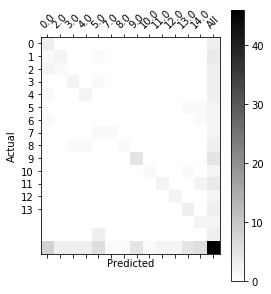

In [23]:
print(Y_test.shape)
#print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(46,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [25]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [26]:
def sentences_to_indices(X, word_to_index, max_len):

    m = X.shape[0]
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):
        
        sentence_words =X[i].lower().split()
        
        j = 0
        for w in sentence_words:
            X_indices[i, j] = word_to_index[w]
            j = j+1
            
 
    
    return X_indices

In [40]:
X1 = np.array(["futbol", "vamos a jugar", "quiero fumar un cigarro"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 4)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['futbol' 'vamos a jugar' 'quiero fumar un cigarro']
X1_indices = [[141524.      0.      0.      0.]
 [195734.  93478. 152644.      0.]
 [175605. 141252. 194907. 112588.]]


In [63]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    
    vocab_len = len(word_to_index) + 1 
    emb_dim = word_to_vec_map["futbol"].shape[0]  
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    embedding_layer = Embedding(vocab_len, emb_dim, trainable = False)

    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [64]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])

weights[0][1][3] = -0.007992


In [71]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    sentence_indices = Input(shape = input_shape, dtype = 'int32')

    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)   

    X = LSTM(128, return_sequences = True)(embeddings)
    X = Dropout(.5)(X)
    X = LSTM(128, return_sequences = False)(X)
    X = Dropout(.5)(X)
    X = Dense(16)(X)
    X = Activation('softmax')(X)

    model = Model(sentence_indices, X)
    
    return model

In [72]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 8, 300)            60000300  
_________________________________________________________________
lstm_7 (LSTM)                (None, 8, 128)            219648    
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
__________

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 16)

In [75]:
X_train_indices

array([[190514., 175605.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [190514.,  99229.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [190514.,  96165.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [136019., 108165.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [157856., 143929.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [161398., 106753.,      0.,      0.,      0.,      0.,      0.,
             0.],
       [125697., 121497., 194907., 108159., 189984., 194907., 108159.,
        112588.],
       [126591., 175335., 141252., 110909., 121083.,      0.,      0.,
             0.],
       [157856., 195205., 141252., 194907., 112588.,      0.,      0.,
             0.],
       [157856., 175412., 186012., 108837., 121497., 112589.,      0.,
             0.],
       [126589., 158967., 156595., 175335., 122399., 121497., 141252.,
             0.],
       [157856., 1856

In [80]:
model.fit(X_train_indices, Y_train_oh, epochs = 1000, batch_size = 32, shuffle=True)

Epoch 1/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 1.0000
Epoch 2/1000
117/117 [==============================] - 0s 926us/step - loss: 0.0032 - acc: 1.0000
Epoch 3/1000
117/117 [==============================] - 0s 917us/step - loss: 0.0022 - acc: 1.0000
Epoch 4/1000
117/117 [==============================] - 0s 934us/step - loss: 0.0024 - acc: 1.0000
Epoch 5/1000
117/117 [==============================] - 0s 934us/step - loss: 0.0026 - acc: 1.0000
Epoch 6/1000
117/117 [==============================] - 0s 934us/step - loss: 0.0023 - acc: 1.0000
Epoch 7/1000
117/117 [==============================] - 0s 917us/step - loss: 0.0037 - acc: 1.0000
Epoch 8/1000
117/117 [==============================] - 0s 917us/step - loss: 0.0019 - acc: 1.0000
Epoch 9/1000
117/117 [==============================] - 0s 904us/step - loss: 0.0030 - acc: 1.0000
Epoch 10/1000
117/117 [==============================] - 0s 944us/step - loss: 0.0033 - acc: 1.0000
Epoch 11/10

117/117 [==============================] - 0s 951us/step - loss: 0.0025 - acc: 1.0000
Epoch 84/1000
117/117 [==============================] - 0s 883us/step - loss: 0.0032 - acc: 1.0000
Epoch 85/1000
117/117 [==============================] - 0s 926us/step - loss: 0.0026 - acc: 1.0000
Epoch 86/1000
117/117 [==============================] - 0s 900us/step - loss: 0.0026 - acc: 1.0000
Epoch 87/1000
117/117 [==============================] - 0s 874us/step - loss: 0.0026 - acc: 1.0000
Epoch 88/1000
117/117 [==============================] - 0s 865us/step - loss: 0.0026 - acc: 1.0000
Epoch 89/1000
117/117 [==============================] - 0s 917us/step - loss: 0.0019 - acc: 1.0000
Epoch 90/1000
117/117 [==============================] - 0s 806us/step - loss: 0.0027 - acc: 1.0000
Epoch 91/1000
117/117 [==============================] - 0s 848us/step - loss: 0.0018 - acc: 1.0000
Epoch 92/1000
117/117 [==============================] - 0s 908us/step - loss: 0.0033 - acc: 1.0000
Epoch 93/1000


117/117 [==============================] - 0s 934us/step - loss: 0.0021 - acc: 1.0000
Epoch 165/1000
117/117 [==============================] - 0s 917us/step - loss: 7.7722e-04 - acc: 1.0000
Epoch 166/1000
117/117 [==============================] - 0s 934us/step - loss: 0.0020 - acc: 1.0000
Epoch 167/1000
117/117 [==============================] - 0s 908us/step - loss: 0.0027 - acc: 1.0000
Epoch 168/1000
117/117 [==============================] - 0s 909us/step - loss: 0.0013 - acc: 1.0000
Epoch 169/1000
117/117 [==============================] - 0s 891us/step - loss: 0.0015 - acc: 1.0000
Epoch 170/1000
117/117 [==============================] - 0s 883us/step - loss: 9.3330e-04 - acc: 1.0000
Epoch 171/1000
117/117 [==============================] - 0s 883us/step - loss: 0.0013 - acc: 1.0000
Epoch 172/1000
117/117 [==============================] - 0s 908us/step - loss: 0.0012 - acc: 1.0000
Epoch 173/1000
117/117 [==============================] - 0s 900us/step - loss: 0.0013 - acc: 1.00

117/117 [==============================] - 0s 883us/step - loss: 9.5856e-04 - acc: 1.0000
Epoch 244/1000
117/117 [==============================] - 0s 952us/step - loss: 7.3024e-04 - acc: 1.0000
Epoch 245/1000
117/117 [==============================] - 0s 926us/step - loss: 5.9474e-04 - acc: 1.0000
Epoch 246/1000
117/117 [==============================] - 0s 969us/step - loss: 9.2245e-04 - acc: 1.0000
Epoch 247/1000
117/117 [==============================] - 0s 917us/step - loss: 7.5712e-04 - acc: 1.0000
Epoch 248/1000
117/117 [==============================] - 0s 960us/step - loss: 6.8761e-04 - acc: 1.0000
Epoch 249/1000
117/117 [==============================] - 0s 934us/step - loss: 0.0012 - acc: 1.0000
Epoch 250/1000
117/117 [==============================] - 0s 883us/step - loss: 6.9889e-04 - acc: 1.0000
Epoch 251/1000
117/117 [==============================] - 0s 977us/step - loss: 6.4978e-04 - acc: 1.0000
Epoch 252/1000
117/117 [==============================] - 0s 874us/step - 

117/117 [==============================] - 0s 951us/step - loss: 4.2021e-04 - acc: 1.0000
Epoch 322/1000
117/117 [==============================] - 0s 909us/step - loss: 5.0128e-04 - acc: 1.0000
Epoch 323/1000
117/117 [==============================] - 0s 831us/step - loss: 5.2005e-04 - acc: 1.0000
Epoch 324/1000
117/117 [==============================] - 0s 883us/step - loss: 4.1903e-04 - acc: 1.0000
Epoch 325/1000
117/117 [==============================] - 0s 900us/step - loss: 7.1526e-04 - acc: 1.0000
Epoch 326/1000
117/117 [==============================] - 0s 891us/step - loss: 6.8771e-04 - acc: 1.0000
Epoch 327/1000
117/117 [==============================] - 0s 917us/step - loss: 3.3490e-04 - acc: 1.0000
Epoch 328/1000
117/117 [==============================] - 0s 891us/step - loss: 7.1242e-04 - acc: 1.0000
Epoch 329/1000
117/117 [==============================] - 0s 1ms/step - loss: 7.4864e-04 - acc: 1.0000
Epoch 330/1000
117/117 [==============================] - 0s 900us/step 

117/117 [==============================] - 0s 882us/step - loss: 6.6267e-04 - acc: 1.0000
Epoch 400/1000
117/117 [==============================] - 0s 849us/step - loss: 3.0900e-04 - acc: 1.0000
Epoch 401/1000
117/117 [==============================] - 0s 934us/step - loss: 4.5463e-04 - acc: 1.0000
Epoch 402/1000
117/117 [==============================] - 0s 934us/step - loss: 4.9663e-04 - acc: 1.0000
Epoch 403/1000
117/117 [==============================] - 0s 960us/step - loss: 3.7285e-04 - acc: 1.0000
Epoch 404/1000
117/117 [==============================] - 0s 892us/step - loss: 5.9351e-04 - acc: 1.0000
Epoch 405/1000
117/117 [==============================] - 0s 883us/step - loss: 3.3464e-04 - acc: 1.0000
Epoch 406/1000
117/117 [==============================] - 0s 874us/step - loss: 5.0150e-04 - acc: 1.0000
Epoch 407/1000
117/117 [==============================] - 0s 926us/step - loss: 6.3258e-04 - acc: 1.0000
Epoch 408/1000
117/117 [==============================] - 0s 866us/ste

117/117 [==============================] - 0s 915us/step - loss: 1.7281e-04 - acc: 1.0000
Epoch 478/1000
117/117 [==============================] - 0s 874us/step - loss: 5.1978e-04 - acc: 1.0000
Epoch 479/1000
117/117 [==============================] - 0s 917us/step - loss: 4.7810e-04 - acc: 1.0000
Epoch 480/1000
117/117 [==============================] - 0s 891us/step - loss: 4.9742e-04 - acc: 1.0000
Epoch 481/1000
117/117 [==============================] - 0s 891us/step - loss: 2.8866e-04 - acc: 1.0000
Epoch 482/1000
117/117 [==============================] - 0s 917us/step - loss: 2.6895e-04 - acc: 1.0000
Epoch 483/1000
117/117 [==============================] - 0s 908us/step - loss: 3.7290e-04 - acc: 1.0000
Epoch 484/1000
117/117 [==============================] - 0s 840us/step - loss: 3.3741e-04 - acc: 1.0000
Epoch 485/1000
117/117 [==============================] - 0s 908us/step - loss: 3.4987e-04 - acc: 1.0000
Epoch 486/1000
117/117 [==============================] - 0s 908us/ste

117/117 [==============================] - 0s 874us/step - loss: 2.8280e-04 - acc: 1.0000
Epoch 556/1000
117/117 [==============================] - 0s 857us/step - loss: 3.0365e-04 - acc: 1.0000
Epoch 557/1000
117/117 [==============================] - 0s 908us/step - loss: 2.5972e-04 - acc: 1.0000
Epoch 558/1000
117/117 [==============================] - 0s 891us/step - loss: 2.3143e-04 - acc: 1.0000 0s - loss: 2.3337e-04 - acc: 1.000
Epoch 559/1000
117/117 [==============================] - 0s 900us/step - loss: 1.9817e-04 - acc: 1.0000
Epoch 560/1000
117/117 [==============================] - 0s 917us/step - loss: 3.1579e-04 - acc: 1.0000
Epoch 561/1000
117/117 [==============================] - 0s 917us/step - loss: 4.9850e-04 - acc: 1.0000
Epoch 562/1000
117/117 [==============================] - 0s 951us/step - loss: 8.1641e-04 - acc: 1.0000
Epoch 563/1000
117/117 [==============================] - 0s 925us/step - loss: 3.2201e-04 - acc: 1.0000
Epoch 564/1000
117/117 [===========

117/117 [==============================] - 0s 917us/step - loss: 2.0378e-04 - acc: 1.0000
Epoch 633/1000
117/117 [==============================] - 0s 857us/step - loss: 2.3974e-04 - acc: 1.0000
Epoch 634/1000
117/117 [==============================] - 0s 849us/step - loss: 2.6000e-04 - acc: 1.0000
Epoch 635/1000
117/117 [==============================] - 0s 994us/step - loss: 2.6790e-04 - acc: 1.0000
Epoch 636/1000
117/117 [==============================] - 0s 960us/step - loss: 3.3315e-04 - acc: 1.0000
Epoch 637/1000
117/117 [==============================] - 0s 960us/step - loss: 4.2504e-04 - acc: 1.0000
Epoch 638/1000
117/117 [==============================] - 0s 934us/step - loss: 1.9857e-04 - acc: 1.0000
Epoch 639/1000
117/117 [==============================] - 0s 934us/step - loss: 3.0871e-04 - acc: 1.0000
Epoch 640/1000
117/117 [==============================] - 0s 892us/step - loss: 2.2105e-04 - acc: 1.0000
Epoch 641/1000
117/117 [==============================] - 0s 900us/ste

117/117 [==============================] - 0s 891us/step - loss: 1.6069e-04 - acc: 1.0000
Epoch 710/1000
117/117 [==============================] - 0s 960us/step - loss: 4.1875e-04 - acc: 1.0000
Epoch 711/1000
117/117 [==============================] - 0s 934us/step - loss: 2.2778e-04 - acc: 1.0000
Epoch 712/1000
117/117 [==============================] - 0s 900us/step - loss: 2.0403e-04 - acc: 1.0000
Epoch 713/1000
117/117 [==============================] - 0s 919us/step - loss: 1.8158e-04 - acc: 1.0000
Epoch 714/1000
117/117 [==============================] - 0s 840us/step - loss: 2.1312e-04 - acc: 1.0000
Epoch 715/1000
117/117 [==============================] - 0s 840us/step - loss: 2.9162e-04 - acc: 1.0000
Epoch 716/1000
117/117 [==============================] - 0s 883us/step - loss: 2.2415e-04 - acc: 1.0000
Epoch 717/1000
117/117 [==============================] - 0s 917us/step - loss: 1.4631e-04 - acc: 1.0000
Epoch 718/1000
117/117 [==============================] - 0s 917us/ste

117/117 [==============================] - 0s 840us/step - loss: 1.4308e-04 - acc: 1.0000
Epoch 788/1000
117/117 [==============================] - 0s 900us/step - loss: 1.2724e-04 - acc: 1.0000
Epoch 789/1000
117/117 [==============================] - 0s 960us/step - loss: 2.3036e-04 - acc: 1.0000
Epoch 790/1000
117/117 [==============================] - 0s 926us/step - loss: 1.5786e-04 - acc: 1.0000
Epoch 791/1000
117/117 [==============================] - 0s 951us/step - loss: 2.8353e-04 - acc: 1.0000
Epoch 792/1000
117/117 [==============================] - 0s 891us/step - loss: 1.3704e-04 - acc: 1.0000
Epoch 793/1000
117/117 [==============================] - 0s 883us/step - loss: 1.5122e-04 - acc: 1.0000
Epoch 794/1000
117/117 [==============================] - 0s 900us/step - loss: 1.4934e-04 - acc: 1.0000
Epoch 795/1000
117/117 [==============================] - 0s 866us/step - loss: 1.5096e-04 - acc: 1.0000
Epoch 796/1000
117/117 [==============================] - 0s 900us/ste

117/117 [==============================] - 0s 857us/step - loss: 8.7378e-05 - acc: 1.0000
Epoch 866/1000
117/117 [==============================] - 0s 926us/step - loss: 1.6325e-04 - acc: 1.0000
Epoch 867/1000
117/117 [==============================] - 0s 891us/step - loss: 1.6767e-04 - acc: 1.0000
Epoch 868/1000
117/117 [==============================] - 0s 908us/step - loss: 1.5299e-04 - acc: 1.0000
Epoch 869/1000
117/117 [==============================] - 0s 925us/step - loss: 1.7270e-04 - acc: 1.0000
Epoch 870/1000
117/117 [==============================] - 0s 891us/step - loss: 1.1102e-04 - acc: 1.0000
Epoch 871/1000
117/117 [==============================] - 0s 926us/step - loss: 9.4647e-05 - acc: 1.0000
Epoch 872/1000
117/117 [==============================] - 0s 883us/step - loss: 3.3453e-04 - acc: 1.0000
Epoch 873/1000
117/117 [==============================] - 0s 874us/step - loss: 7.3546e-05 - acc: 1.0000
Epoch 874/1000
117/117 [==============================] - 0s 960us/ste

117/117 [==============================] - 0s 942us/step - loss: 8.9242e-05 - acc: 1.0000
Epoch 944/1000
117/117 [==============================] - 0s 882us/step - loss: 1.7051e-04 - acc: 1.0000
Epoch 945/1000
117/117 [==============================] - 0s 908us/step - loss: 2.7268e-04 - acc: 1.0000
Epoch 946/1000
117/117 [==============================] - 0s 926us/step - loss: 1.4766e-04 - acc: 1.0000
Epoch 947/1000
117/117 [==============================] - 0s 900us/step - loss: 8.2596e-05 - acc: 1.0000
Epoch 948/1000
117/117 [==============================] - 0s 917us/step - loss: 6.8526e-05 - acc: 1.0000
Epoch 949/1000
117/117 [==============================] - 0s 833us/step - loss: 6.6785e-05 - acc: 1.0000
Epoch 950/1000
117/117 [==============================] - 0s 882us/step - loss: 9.3053e-05 - acc: 1.0000
Epoch 951/1000
117/117 [==============================] - 0s 951us/step - loss: 1.0429e-04 - acc: 1.0000
Epoch 952/1000
117/117 [==============================] - 0s 926us/ste

In [81]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 16)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

46/46 [==============================] - 0s 654us/step

Test accuracy =  0.5000000077745189


In [82]:
C = 16
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:🙌 prediction: las chivas quedaron campeones⚽
Expected emoji:⚽ prediction: me gusta el futbol😋
Expected emoji:⚽ prediction: quiero seguir jugando😋
Expected emoji:💰 prediction: préstamos🙌
Expected emoji:💰 prediction: préstamo de dinero⚽
Expected emoji:💰 prediction: las entidades financieras😡
Expected emoji:👙 prediction: por fin vacaciones😄
Expected emoji:🚬 prediction: no pude aguantar y fui por cigarros👎
Expected emoji:👌 prediction: quedó bien el proyecto👍
Expected emoji:❤ prediction: la amo😄
Expected emoji:❤ prediction: lo amo😄
Expected emoji:👎 prediction: no me gustó😡
Expected emoji:😞 prediction: me siento decepcionado😡
Expected emoji:😞 prediction: estoy triste😡
Expected emoji:😞 prediction: tanto esfuerzo no sirvió para nada👎
Expected emoji:🙌 prediction: vamos a ganar chivas⚽
Expected emoji:👌 prediction: que perfeccionista😄
Expected emoji:😞 prediction: me siento abrumado😡
Expected emoji:😡 prediction: que mamada😄
Expected emoji:👙 prediction: amo las vacaciones😄
Expected e

In [88]:
mariana vamos a comer
mariana te extraño
mariana no vamos a comer
mariana vamos a jugar futbol
estoy cansado

SyntaxError: invalid syntax (<ipython-input-88-07f92b6f7eca>, line 1)

In [100]:
x_test = np.array(['estoy cansado'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

estoy cansado 😡
